## Problem 1: Identifying Regulatory Elements

In [15]:
dna = "CTGACTAACAGCGCAGGCGAGCCGACCGGTGTTTACACGTTTCCCCC\
GCTGACTATATGTTCGTTTCCCCCGCTGACTAACAGCGCAGGCGAGCCGAC\
CGGTGCGATCTATAGGAGGTGCACGATGGAAGACGCCAAAAACATTAAGAA\
GGGCCCAGCGCCATTCTACCCA"

def find_indices_of_element(dna, element):
    element_length = len(element)
    indices = []
    for i in range(len(dna) - len(element) + 1):
        if (dna[i:i+element_length] == element):
            indices.append(i)
    return indices

print("Start indices of certain sequences:")
print("TTTACAC: " + str(find_indices_of_element(dna, "TTTACAC")))
print("TATATG: " + str(find_indices_of_element(dna, "TATATG")))
print("AGGAGG: " + str(find_indices_of_element(dna, "AGGAGG")))
print("ATG: " + str(find_indices_of_element(dna, "ATG")))
print()
print("difference between -35 and -10 sequences (expected 25): " + str(53 - 31))

Start indices of certain sequences:
TTTACAC: [31]
TATATG: [53]
AGGAGG: [111]
ATG: [56, 123]

difference between -35 and -10 sequences (expected 25): 22


The start codon will always be ATG, and this 3mer only occurs twice in the entire sequence. As the ribosome binding side (RBS) in prokaryotes is the Shine-Dalgarno region (consensus: AGGAGG), and the RBS occurs roughly eight base pairs ahead of the start codon, it is possible to identify which ATG 3mer is the actual start codon. Both of these regions are bolded below.

'5.....CTGACTAACAGCGCAGGCGAGCCGACCGGTGTTTACACGTTTCCCCC <br />
GCTGACTATATGTTCGTTTCCCCCGCTGACTAACAGCGCAGGCGAGCCGAC    <br />
CGGTGCGATCTAT**AGGAGG**TGCACG**ATG**GAAGACGCCAAAAACATTAAGAA <br />
GGGCCCAGCGCCATTCTACCCA.....3'

The promoter elements include the "TTGACAT" sequence, typically 35 bases in front of the transcription start site (TSS), and the "TATAAT" sequence, typically 10 bases in front of the TSS. This means they should start roughly 25 bases apart from each other. The two promoter sequences were chosen because they most closely resembled the consensus sequences compared to other subsequences and were a reasonable distance apart (22 bases). The bolded regions below are, in order, the -35 promoter sequence, the -10 promoter sequence, the ribosome binding site, and the start codon.


'5.....CTGACTAACAGCGCAGGCGAGCCGACCGGTG**TTTACAC**GTTTCCCCC <br />
GCTGAC**TATATG**TTCGTTTCCCCCGCTGACTAACAGCGCAGGCGAGCCGAC    <br />
CGGTGCGATCTAT**AGGAGG**TGCACG**ATG**GAAGACGCCAAAAACATTAAGAA <br />
GGGCCCAGCGCCATTCTACCCA.....3'

## Problem 2

**a. What are the four phases of translation and which step is rate limiting?**

The four phases of ribosomal translation of an mRNA transcript following 30S complex assembly are initiation, elongation, termination, and turnover of ribosomal subunits. The rate-limiting step is the translation initiation, which is determined by multiple molecular interactions that include the hybridization of the 16S rRNA to the RBS sequence, the binding of tRNAfMET to the start codon, the distance between the 16S rRNA binding site and the start codon (called spacing) and the presence of RNA secondary structures that occlude either the 16S rRNA binding site or the standby site.’ Therefore the amount of expressed protein is proportional to the translation initiation rate. 

**b. What part of the ribosome does the RBS bind to?**
The RBS will hybridize to 165 rRNA molecule that forms part of the bacterial ribosome

**c. Score the sequence from problem 1 using the RBS calculator. Select Escherichia coli as the organism, and report the maximum Translation Rate out of all possible ORFs detected.**

Maximum translation rate of unmodified transcript: 2212.3

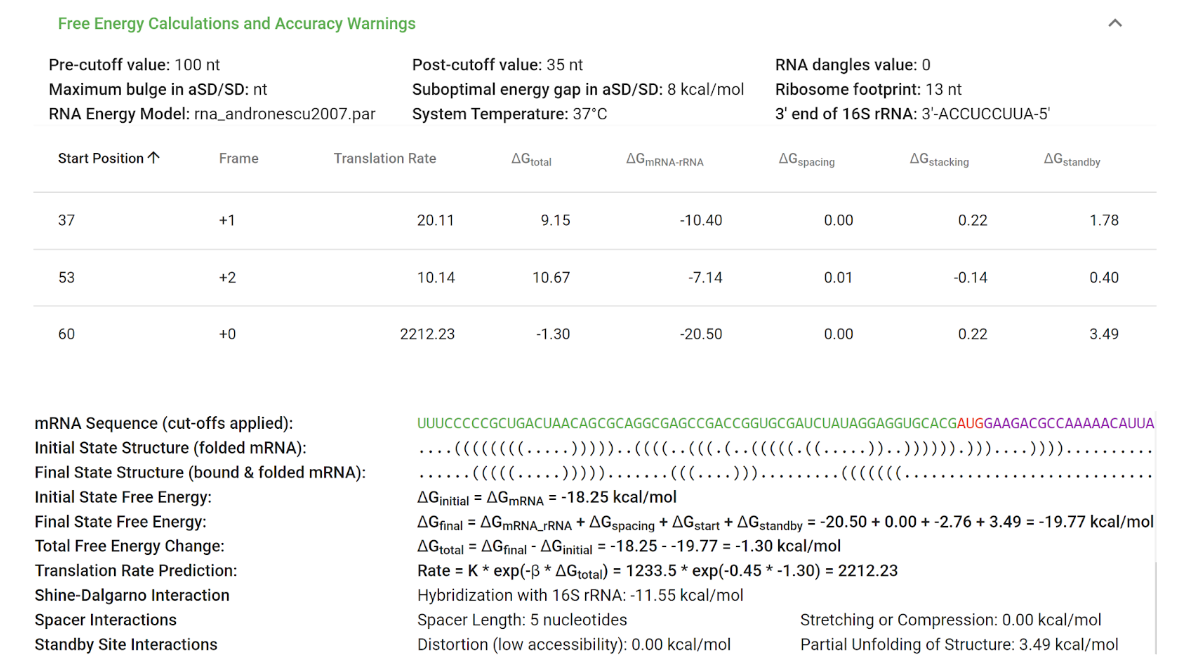

**d. In order to design a better RBS and increase the translation of your synthetic protein, make up to three changes (point mutations, single base insertions or single base deletions) to the sequence above. Briefly discuss your reasoning and show RBS scores and sequence changes for the final sequence and all relevant intermediates.**

By changing the standby site from CTAT to AGAA (which is much more similar to the standby site in the Salis article):
- The translation rate increased significantly from 2212.23 to 28866.40
- The deltaG mRNA was higher contributing to a higher Gibbs free energy of the initial state and ultimately a more favorable total deltaG
- DeltaG standby decreased from 3.49 to 0.72 which is directly related to the base changes at the standby site this decreased deltaG of the final state again for a more favorable total Gibbs free energy
- This change also eliminated the energy penalty from the partial unfolding of structure which is also an effect of standby site interactions

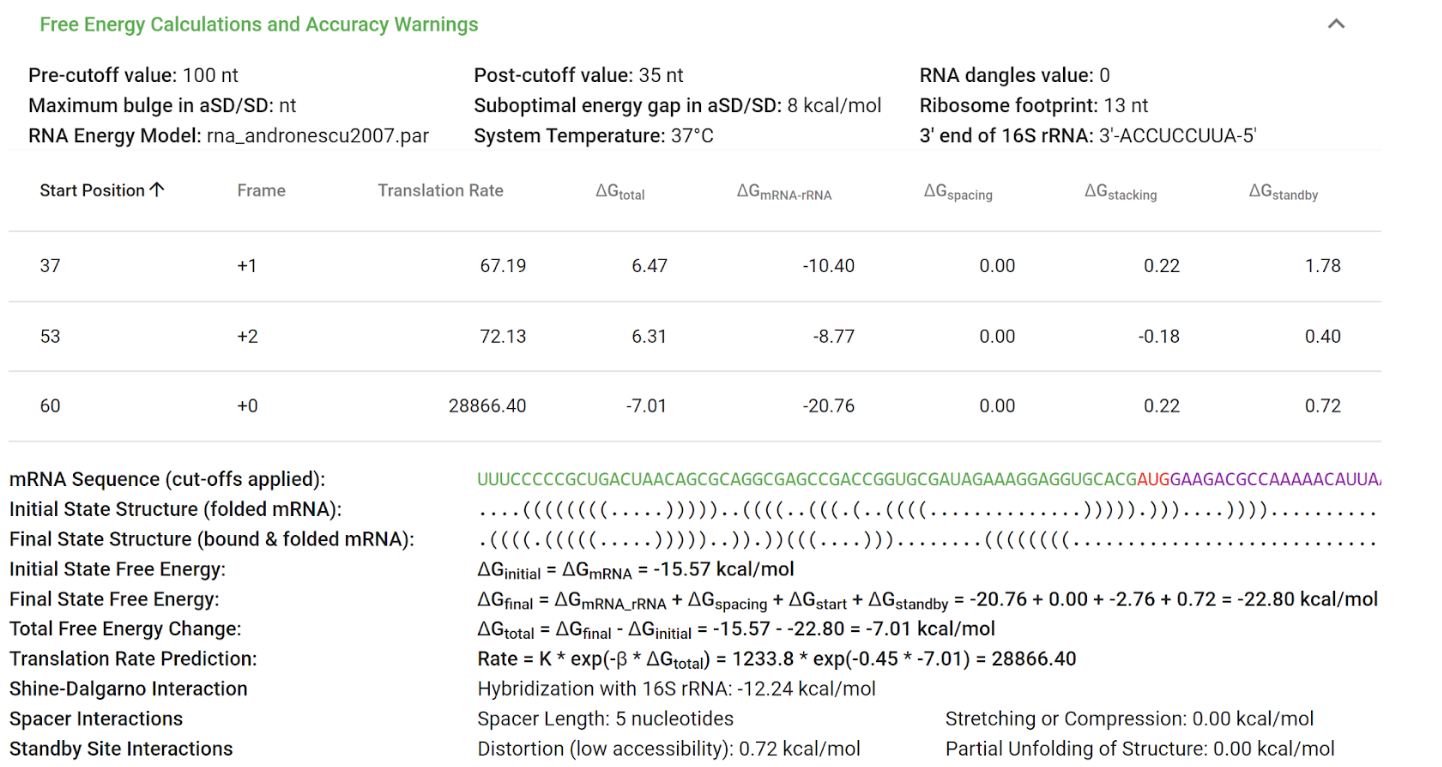

In [16]:
# The below is recycled code from HW 1 that is used to turn DNA sequences into
# RNA sequences
# In this case, it is being used to turn a DNA sequence
# into its corresponding RNA sequence. The reverse complement
# is *not* being found becausde it is assumed that the DNA
# sequence provided is the coding strand, that is, it would
# be the other strand that is actually used by the RNA 
# polymerase to make the RNA.

#
# Helpful dictionary for looking up the reverse complement base.
# Example: BASE_PAIRS['A'] -> 'T'
#
BASE_PAIRS = {
    'A' : 'T',
    'C' : 'G',
    'G' : 'C',
    'T' : 'A'
}

#
# Helpful dictionary for looking up an Amino acid given a codon.
# Example: CODON_TO_AMINO['CUG'] -> 'Leu'
#
CODON_TO_AMINO = {
    'UUU' : 'Phe',
    'UUC' : 'Phe',
    'UUA' : 'Leu',
    'UUG' : 'Leu',
    'UCU' : 'Ser',
    'UCC' : 'Ser',
    'UCA' : 'Ser',
    'UCG' : 'Ser',
    'UAU' : 'Tyr',
    'UAC' : 'Tyr',
    'UAA' : 'STOP',
    'UAG' : 'STOP',
    'UGU' : 'Cys',
    'UGC' : 'Cys',
    'UGA' : 'STOP',
    'UGG' : 'Trp',
    'CUU' : 'Leu',
    'CUC' : 'Leu',
    'CUA' : 'Leu',
    'CUG' : 'Leu',
    'CCU' : 'Pro',
    'CCC' : 'Pro',
    'CCA' : 'Pro',
    'CCG' : 'Pro',
    'CAU' : 'His',
    'CAC' : 'His',
    'CAA' : 'Gln',
    'CAG' : 'Gln',
    'CGU' : 'Arg',
    'CGC' : 'Arg',
    'CGA' : 'Arg',
    'CGG' : 'Arg',
    'AUU' : 'Ile',
    'AUC' : 'Ile',
    'AUA' : 'Ile',
    'AUG' : 'Met',
    'ACU' : 'Thr',
    'ACC' : 'Thr',
    'ACA' : 'Thr',
    'ACG' : 'Thr',
    'AAU' : 'Asn',
    'AAC' : 'Asn',
    'AAA' : 'Lys',
    'AAG' : 'Lys',
    'AGU' : 'Ser',
    'AGC' : 'Ser',
    'AGA' : 'Arg',
    'AGG' : 'Arg',
    'GUU' : 'Val',
    'GUC' : 'Val',
    'GUA' : 'Val',
    'GUG' : 'Val',
    'GCU' : 'Ala',
    'GCC' : 'Ala',
    'GCA' : 'Ala',
    'GCG' : 'Ala',
    'GAU' : 'Asp',
    'GAC' : 'Asp',
    'GAA' : 'Glu',
    'GAG' : 'Glu',
    'GGU' : 'Gly',
    'GGC' : 'Gly',
    'GGA' : 'Gly',
    'GGG' : 'Gly'
}

def reverse_complement(seq):
    ans = ""
    for base in reversed(seq):
        ans += BASE_PAIRS[base]
    return ans

def convert_dna_to_rna(dna):
    rna = ""
    for base in dna:
        if (base == 'T'):
            rna += 'U'
        else:
            rna += base
    return rna

dna = "TTTCCCCCGCTGACTAACAGCGCAGGCGAGCCGACCGGTGCGATCTATAGGAGGTGCACGATGGAAGACGCCAAAAACATTAAGAAGGGCCCAGCGCCATTCTACCCA"
print("RNA = " + convert_dna_to_rna(dna))

RNA = UUUCCCCCGCUGACUAACAGCGCAGGCGAGCCGACCGGUGCGAUCUAUAGGAGGUGCACGAUGGAAGACGCCAAAAACAUUAAGAAGGGCCCAGCGCCAUUCUACCCA


## Problem 3: Simulating CRNs

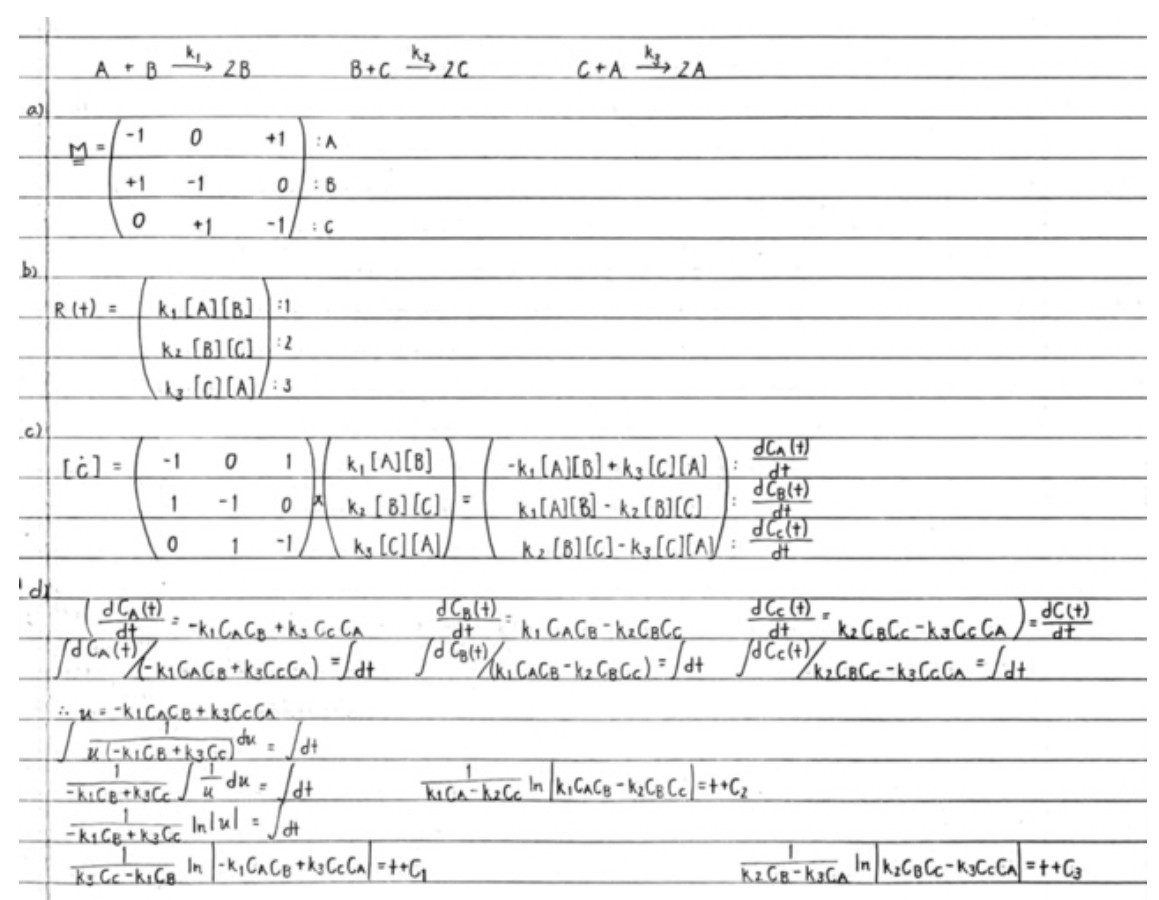

Graphs of the equations are found below.

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [18]:
#####
#
# TODO: Implement a function that returns the first order derivatives of c 
# (the concentration vector (c_a(t), c_b(t), c_c(t))).
# The function takes as input the concentration vector c,
# the time vector t and rate constants k1, k2 and k3.
#
#####
def get_ode_derivatives(c, t, k1, k2, k3):
    
    c_a, c_b, c_c = c
    
    # The below equations were derived by hand for Problem 3 of the worksheet. 
    dcdt = [
        ((-k1 * c_a * c_b) + (k3 * c_a * c_c)), # d/dt(c_a)
        ((-k2 * c_b * c_c) + (k1 * c_b * c_a)), # d/dt(c_b)
        ((-k3 * c_c * c_a) + (k2 * c_c * c_b))  # d/dt(c_c)
    ]
    
    return dcdt


Solving ODE for
c0_a = 0.2
c0_b = 0.3
c0_c = 0.5
Solving ODE for
c0_a = 0.05
c0_b = 0.9
c0_c = 0.05


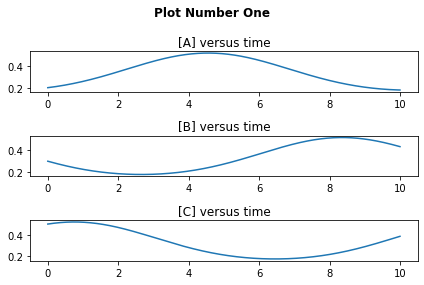

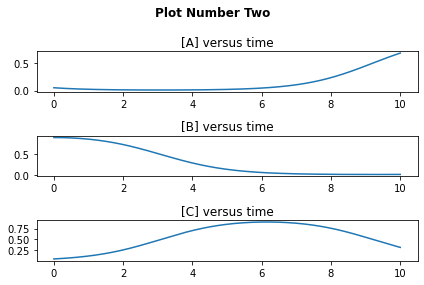

In [19]:
# Solves an ODE, taking as input the above derivative functions, initial conditions
# of the concentrations, numerical values for rate constants, and a time vector
def solve_crn_ode(deriv_function, c0, time, k):
    k1, k2, k3 = k
    a = sp.integrate.odeint(deriv_function, c0, time, args=(k1, k2, k3))
    # return the transposed array, which is better formatted for graphing
    return np.array(a).T  

# takes in the time array, the solution array, and an array of the names of the variables.
# it will make one figure with all of them, and return the figure and array of axes
def print_crn_solution(time, array_sol, var_names):
    num_vars, length = array_sol.shape
    fig, axs = plt.subplots(nrows=num_vars)
    # the below loop creates the graph for each variable
    for ax, row, name in zip(axs, array_sol, var_names):
        ax.plot(time, row)
        ax.set_title(name + " versus time")
    return fig, axs


# The rate reaction constants
k1 = 1
k2 = 1
k3 = 1
k = (k1, k2, k3)

t0 = 0          # Initial time    init:    0 
tn = 10         # Final time      init:   10
tsteps = 1001   # Number of steps init: 1001
time_vector = np.array(np.linspace(t0, tn, tsteps))

# Initial concentrations for CRN 1.
c0_a = 0.2
c0_b = 0.3
c0_c = 0.5
c0 = [c0_a, c0_b, c0_c]

print('Solving ODE for')
print('c0_a = ' + str(c0_a))
print('c0_b = ' + str(c0_b))
print('c0_c = ' + str(c0_c))

sol1 = solve_crn_ode(get_ode_derivatives, c0, time_vector, k)
    
names = ["[A]", "[B]", "[C]"]
fig1, axs1 = print_crn_solution(time_vector, sol1, names)
fig1.suptitle("Plot Number One", weight='bold')
fig1.tight_layout()
    
#TODO: Write code that numerically solves the ODE using scipy.integrate.odeint.
#      odeint expects your derivative-function implemented in the cell above as input,
#      along with the initial condititions, rate constants, and a vector of time.
#      For a brief tutorial, look at:
#      https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint
#TODO: Write code that plots the solution curves of the ODE.
#      Use the matplotlib.pyplot library for this.

# Initial concentrations for CRN 2.
c0_a = 0.05
c0_b = 0.90
c0_c = 0.05
c0 = [c0_a, c0_b, c0_c]

print('Solving ODE for')
print('c0_a = ' + str(c0_a))
print('c0_b = ' + str(c0_b))
print('c0_c = ' + str(c0_c))

sol2 = solve_crn_ode(get_ode_derivatives, c0, time_vector, k)
fig2, axs2 = print_crn_solution(time_vector, sol2, names)
fig2.suptitle("Plot Number Two", weight='bold')
fig2.tight_layout()


Note: Plot Number One, graphing the first set of initial conditions, can be clearly seen as an oscillating system. The same is true of Plot Number Two, but it is difficult to see because it has a longer period, and t_end is set in the homework description.

## Problem 4

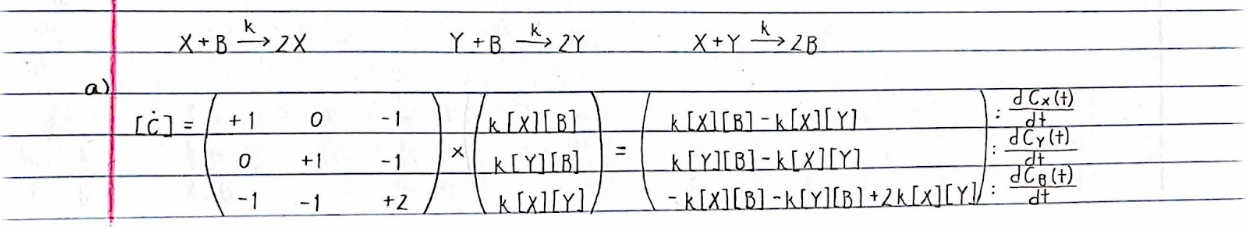

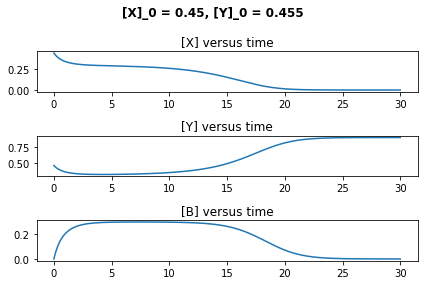

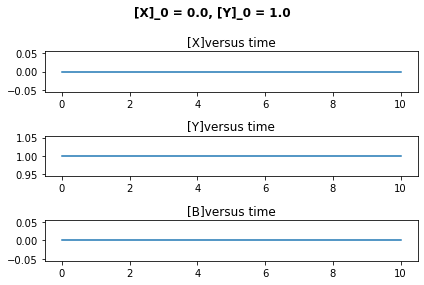

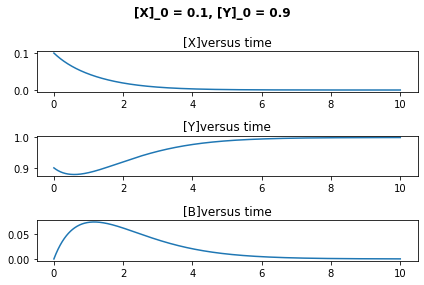

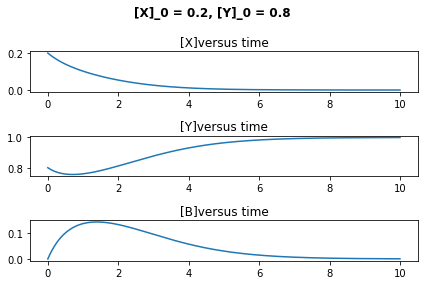

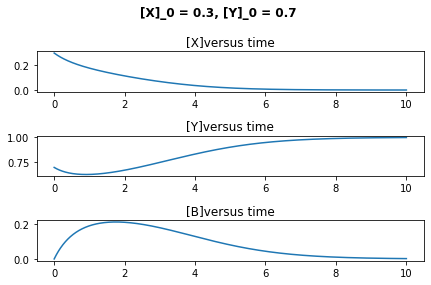

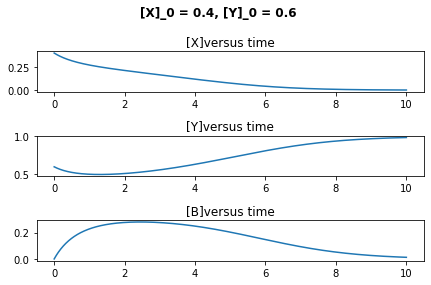

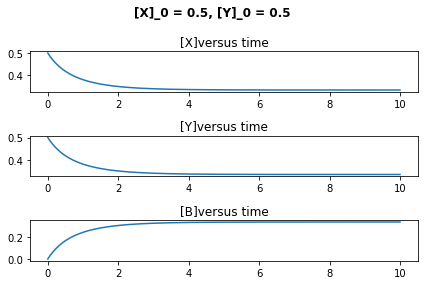

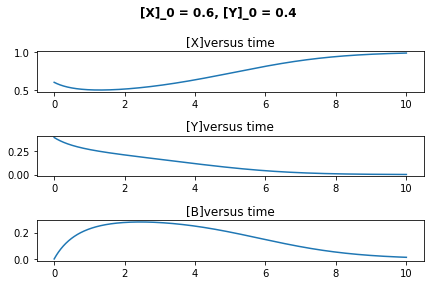

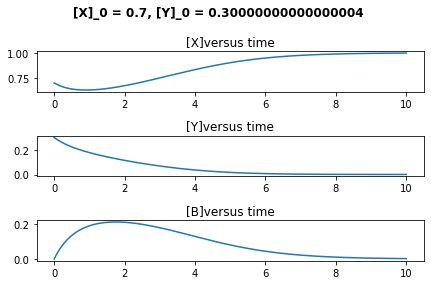

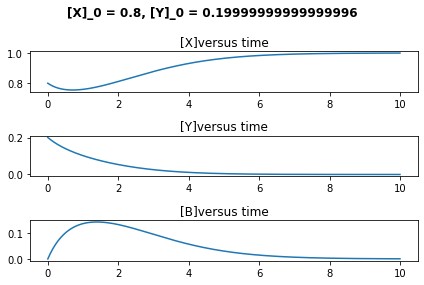

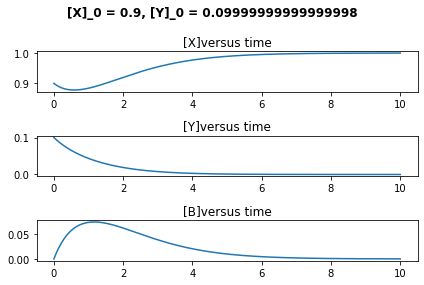

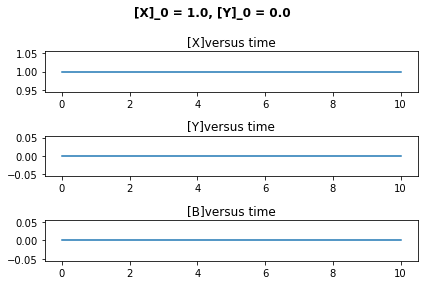

In [20]:
def get_grad_ode_derivatives(c, t, k1, k2, k3):
    x, y, b = c
    
    # The below equations were derived by hand for Problem 3 of the worksheet. 
    dcdt = [
        (k1 * (x*b - x*y)), # d/dt(c_x)
        (k2 * (y*b - x*y)), # d/dt(c_y)
        (k3 * (2*x*y - x*b - y*b))  # d/dt(c_b)
    ]
    
    return dcdt
    
    
# The below method (run_grad_sims) graphs various initial
# concentrations of X and Y in the graduate student CRN.
def run_grad_sims():
    t0 = 0          # Initial time    init:    0 
    tn = 10         # Final time      init:   10
    tsteps = 1001   # Number of steps init: 1001
    time = np.array(np.linspace(t0, tn, tsteps))
    k1 = 1
    k2 = 1
    k3 = 1
    k = (k1, k2, k3)
    names = ["[X]", "[Y]", "[B]"]
    # Goes through various ratios of initial conditions.
    for i in range(11):
        c0_x = i / 10
        c0_y = 1 - c0_x
        c0_b = 0
        c0 = [c0_x, c0_y, c0_b]        
        sol = solve_crn_ode(get_grad_ode_derivatives, c0, time, k)
        
        plt.figure(i + 1) # Can't plot at figure 0 so have to start at 1.
        fig, axs = plt.subplots(3) # [X], [Y], [B]
        new_plotter(fig, axs, time, sol, names)
        fig.tight_layout()
        
# Initial, very close concentrations
c0_x = 0.45
c0_y = 0.455
c0_b = 0.0
c0 = [c0_x, c0_y, c0_b]

# The rate reaction constants
k1 = 1
k2 = 1
k3 = 1
k = (k1, k2, k3)

# This set of initial conditions needs more time to 
# come to equilibrium. 
t0 = 0          # Initial time    init:    0 
tn = 30         # Final time      init:   10
tsteps = 3001   # Number of steps init: 1001
time = np.array(np.linspace(t0, tn, tsteps))

# finds the solution for this set of initial condiitons
sol_cool = solve_crn_ode(get_grad_ode_derivatives, c0, time, k)

names = ["[X]", "[Y]", "[B]"]
fig2, axs2 = print_crn_solution(time, sol_cool, names)
fig2.suptitle("[X]_0 = 0.45, [Y]_0 = 0.455", weight='bold')
fig2.tight_layout()




        
# The number of axes (array) needs to match the number of names, and the number of
# rows in the solution file. Otherwise things will probably break.
# AKA the fig and axes need to be created outside of the method using plt.subplots

# Graphs arrays of data arrays to axes.
def new_plotter(fig, axs, time, solution, names):
    # the below loop creates the graph for each variable
    fig.suptitle("[X]_0 = " + str(solution[0][0]) + ", [Y]_0 = " + str(solution[1][0]),\
                 weight='bold')
    for ax, row, name in zip(axs, solution, names):
        ax.plot(time, row)
        ax.set_title(name + "versus time")

run_grad_sims()
        
    
    

c. In this system both species X and species Y consume B to increase the amount of their species. Yet if species X and Y are together they are both consumed to increase the amount of B. As a realistic example X could be a garter snake that takes in slugs (B) as food and Y could be a poisonous dart frog that also consumes slugs (B).  Since X and Y both have the same food source there could be competition when in proximity to one another without B present, such that the garter snake could try to consume the dart frog and both would die. This would leave the slug population to grow as their predators are no longer around. 